In [5]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [6]:
files_to_ignore = ['.DS_Store']
script_1_path = '../../model_results/lstm_results/script_1/'
script_1_folders = os.listdir('../../model_results/lstm_results/script_1/')
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['LSTM_2023-08-25_17-19-18',
 'LSTM_2023-08-28_14-02-50',
 'LSTM_2023-08-27_14-34-10',
 'LSTM_2023-08-29_22-15-03',
 'final_merged_results']

In [8]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}lstm_script_1_gridSearch_results.csv')
df

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
0,1,1,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,512,...,0.4135,"{0: 0.62, 1: 0.29, 2: 0.24}","{0: 0.42, 1: 0.57, 2: 0.12}","{0: 0.5, 1: 0.38, 2: 0.16}","{'precision': 0.38, 'recall': 0.37, 'f1_score'...","{'precision': 0.47, 'recall': 0.41, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
1,1,2,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,1024,...,0.4318,"{0: 0.61, 1: 0.32, 2: 0.17}","{0: 0.45, 1: 0.63, 2: 0.07}","{0: 0.52, 1: 0.42, 2: 0.1}","{'precision': 0.37, 'recall': 0.38, 'f1_score'...","{'precision': 0.46, 'recall': 0.43, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 30}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
2,1,3,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,2048,...,0.4661,"{0: 0.6, 1: 0.32, 2: 0.24}","{0: 0.54, 1: 0.57, 2: 0.02}","{0: 0.57, 1: 0.41, 2: 0.04}","{'precision': 0.39, 'recall': 0.38, 'f1_score'...","{'precision': 0.47, 'recall': 0.47, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
3,1,4,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,4096,...,0.4736,"{0: 0.59, 1: 0.33, 2: 0.15}","{0: 0.58, 1: 0.52, 2: 0.02}","{0: 0.59, 1: 0.4, 2: 0.03}","{'precision': 0.36, 'recall': 0.37, 'f1_score'...","{'precision': 0.45, 'recall': 0.47, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
4,1,5,5,32,0.0,sigmoid,categorical_crossentropy,SGD,500,512,...,0.4627,"{0: 0.63, 1: 0.3, 2: 0.19}","{0: 0.58, 1: 0.4, 2: 0.13}","{0: 0.6, 1: 0.34, 2: 0.16}","{'precision': 0.37, 'recall': 0.37, 'f1_score'...","{'precision': 0.47, 'recall': 0.46, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,1,4604,5,128,0.6,softmax,hinge,Adam,500,4096,...,0.3024,"{0: 0.58, 1: 0.26, 2: 0.15}","{0: 0.19, 1: 0.64, 2: 0.16}","{0: 0.28, 1: 0.37, 2: 0.15}","{'precision': 0.33, 'recall': 0.33, 'f1_score'...","{'precision': 0.43, 'recall': 0.3, 'f1_score':...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_Adam_...
3452,1,4605,5,128,0.6,softmax,hinge,Adam,1000,512,...,0.3211,"{0: 0.58, 1: 0.28, 2: 0.17}","{0: 0.21, 1: 0.64, 2: 0.2}","{0: 0.3, 1: 0.39, 2: 0.19}","{'precision': 0.34, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.32, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_Adam_...
3453,1,4606,5,128,0.6,softmax,hinge,Adam,1000,1024,...,0.3411,"{0: 0.59, 1: 0.28, 2: 0.17}","{0: 0.28, 1: 0.55, 2: 0.23}","{0: 0.38, 1: 0.37, 2: 0.2}","{'precision': 0.35, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.34, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 30}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_Adam_...
3454,1,4607,5,128,0.6,softmax,hinge,Adam,1000,2048,...,0.3420,"{0: 0.63, 1: 0.29, 2: 0.18}","{0: 0.24, 1: 0.65,

In [9]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [10]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
0,1,1,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,512,...,0.4135,"{0: 0.62, 1: 0.29, 2: 0.24}","{0: 0.42, 1: 0.57, 2: 0.12}","{0: 0.5, 1: 0.38, 2: 0.16}","{'precision': 0.38, 'recall': 0.37, 'f1_score'...","{'precision': 0.47, 'recall': 0.41, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
1,1,2,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,1024,...,0.4318,"{0: 0.61, 1: 0.32, 2: 0.17}","{0: 0.45, 1: 0.63, 2: 0.07}","{0: 0.52, 1: 0.42, 2: 0.1}","{'precision': 0.37, 'recall': 0.38, 'f1_score'...","{'precision': 0.46, 'recall': 0.43, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 30}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
2,1,3,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,2048,...,0.4661,"{0: 0.6, 1: 0.32, 2: 0.24}","{0: 0.54, 1: 0.57, 2: 0.02}","{0: 0.57, 1: 0.41, 2: 0.04}","{'precision': 0.39, 'recall': 0.38, 'f1_score'...","{'precision': 0.47, 'recall': 0.47, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
3,1,4,5,32,0.0,sigmoid,categorical_crossentropy,SGD,250,4096,...,0.4736,"{0: 0.59, 1: 0.33, 2: 0.15}","{0: 0.58, 1: 0.52, 2: 0.02}","{0: 0.59, 1: 0.4, 2: 0.03}","{'precision': 0.36, 'recall': 0.37, 'f1_score'...","{'precision': 0.45, 'recall': 0.47, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
4,1,5,5,32,0.0,sigmoid,categorical_crossentropy,SGD,500,512,...,0.4627,"{0: 0.63, 1: 0.3, 2: 0.19}","{0: 0.58, 1: 0.4, 2: 0.13}","{0: 0.6, 1: 0.34, 2: 0.16}","{'precision': 0.37, 'recall': 0.37, 'f1_score'...","{'precision': 0.47, 'recall': 0.46, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0_sigmoid_categorical_cr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,1,4592,5,128,0.6,softmax,hinge,SGD,500,4096,...,0.4367,"{0: 0.56, 1: 0.28, 2: 0.18}","{0: 0.54, 1: 0.48, 2: 0.0}","{0: 0.55, 1: 0.35, 2: 0.01}","{'precision': 0.34, 'recall': 0.34, 'f1_score'...","{'precision': 0.43, 'recall': 0.44, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_SGD_5...
3440,1,4593,5,128,0.6,softmax,hinge,SGD,1000,512,...,0.4392,"{0: 0.6, 1: 0.31, 2: 0.22}","{0: 0.48, 1: 0.59, 2: 0.04}","{0: 0.54, 1: 0.4, 2: 0.07}","{'precision': 0.37, 'recall': 0.37, 'f1_score'...","{'precision': 0.46, 'recall': 0.44, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_SGD_1...
3441,1,4594,5,128,0.6,softmax,hinge,SGD,1000,1024,...,0.4508,"{0: 0.6, 1: 0.31, 2: 0.15}","{0: 0.52, 1: 0.58, 2: 0.0}","{0: 0.55, 1: 0.4, 2: 0.01}","{'precision': 0.35, 'recall': 0.37, 'f1_score'...","{'precision': 0.45, 'recall': 0.45, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 30}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_softmax_hinge_SGD_1...
3442,1,4595,5,128,0.6,softmax,hinge,SGD,1000,2048,...,0.4506,"{0: 0.58, 1: 0.3, 2: 1.0}","{0: 0.54, 1: 0.52, 2: 0.0}"

In [11]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [12]:
top_n_model_test_accuracy_indexes

Index([3267, 1898,  963, 1248,  438, 3321, 3035, 3027, 1585, 1899,  388, 2980,
       2981, 2696, 3332, 3028,  986,  990,  991,  985,  995,  984,  994,  989,
        691,  701, 2741,  696,  706,  444,  459, 1249,  967, 1016,  440, 1033,
       2113, 3323, 2409, 1540, 2114, 1894,  408,  413,  418,  673,  437, 1828,
       2122, 2984,  707,  745,  702,  697, 2690, 3291, 2452, 1881,  703,  971,
       2408,  698,  419,  987, 2160,  409,  414,  120, 2697,  125, 3290,  131,
        415,  130, 1901, 2117, 3295,  988,  410,  993, 3029,  127,  104, 2745,
        122,  126,  121, 1034, 3003, 3322, 3270, 1880, 3272, 2449, 2450, 2699,
       2138, 2143, 1592, 3268],
      dtype='int64')

In [13]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
3267,1,4372,5,128,0.6,relu,binary_crossentropy,SGD,250,4096,...,0.5904,"{0: 0.62, 1: 0.47, 2: 0.75}","{0: 0.88, 1: 0.32, 2: 0.0}","{0: 0.73, 1: 0.38, 2: 0.0}","{'precision': 0.61, 'recall': 0.4, 'f1_score':...","{'precision': 0.6, 'recall': 0.59, 'f1_score':...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_relu_binary_crossen...
1898,1,2547,5,64,0.4,tanh,binary_crossentropy,SGD,250,2048,...,0.5891,"{0: 0.62, 1: 0.45, 2: 0.0}","{0: 0.87, 1: 0.34, 2: 0.0}","{0: 0.73, 1: 0.39, 2: 0.0}","{'precision': 0.36, 'recall': 0.4, 'f1_score':...","{'precision': 0.48, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.4_tanh_binary_crossent...
963,1,1300,5,32,0.6,relu,binary_crossentropy,SGD,250,4096,...,0.5803,"{0: 0.61, 1: 0.42, 2: 0.0}","{0: 0.9, 1: 0.24, 2: 0.0}","{0: 0.73, 1: 0.31, 2: 0.0}","{'precision': 0.34, 'recall': 0.38, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0.6_relu_binary_crossent...
1248,1,1681,5,64,0.0,relu,binary_crossentropy,SGD,250,512,...,0.5783,"{0: 0.58, 1: 0.59, 2: 0.38}","{0: 1.0, 1: 0.01, 2: 0.02}","{0: 0.73, 1: 0.02, 2: 0.05}","{'precision': 0.52, 'recall': 0.34, 'f1_score'...","{'precision': 0.55, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0_relu_binary_crossentro...
438,1,583,5,32,0.2,tanh,categorical_crossentropy,SGD,500,2048,...,0.5767,"{0: 0.58, 1: 0.0, 2: 0.32}","{0: 1.0, 1: 0.0, 2: 0.02}","{0: 0.73, 1: 0.0, 2: 0.05}","{'precision': 0.3, 'recall': 0.34, 'f1_score':...","{'precision': 0.38, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0.2_tanh_categorical_cro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,1,3612,5,128,0.2,relu,binary_crossentropy,SGD,1000,4096,...,0.5408,"{0: 0.62, 1: 0.32, 2: 0.23}","{0: 0.82, 1: 0.2, 2: 0.11}","{0: 0.71, 1: 0.25, 2: 0.15}","{'precision': 0.39, 'recall': 0.38, 'f1_score'...","{'precision': 0.48, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.2_relu_binary_crossen...
2138,1,2859,5,64,0.6,relu,hinge,SGD,250,2048,...,0.5407,"{0: 0.59, 1: 0.33, 2: 0.06}","{0: 0.84, 1: 0.22, 2: 0.0}","{0: 0.69, 1: 0.27, 2: 0.01}","{'precision': 0.33, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.6_relu_hinge_SGD_250_2...
2143,1,2864,5,64,0.6,relu,hinge,SGD,500,4096,...,0.5405,"{0: 0.59, 1: 0.34, 2: 0.07}","{0: 0.83, 1: 0.23, 2: 0.0}","{0: 0.69, 1: 0.27, 2: 0.01}","{'precision': 0.33, 'recall': 0.36, 'f1_score'...","{'precision': 0.44, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.6_relu_hinge_SGD_500_4...
1592,1,2121,5,64,0.2,tanh,categorical_crossentropy,SGD,1000,512,...,0.5404,"{0: 0.58, 1: 0.29, 2: 0.12}","{0: 0.89, 1: 0.11, 2:

In [14]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [15]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

0.28959999999999997
0.3102
0.24070000000000003
0.11859999999999998
0.20330000000000004
0.15949999999999998


In [16]:
top_n_models

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
3267,1,4372,5,128,0.6,relu,binary_crossentropy,SGD,250,4096,...,0.5904,"{0: 0.62, 1: 0.47, 2: 0.75}","{0: 0.88, 1: 0.32, 2: 0.0}","{0: 0.73, 1: 0.38, 2: 0.0}","{'precision': 0.61, 'recall': 0.4, 'f1_score':...","{'precision': 0.6, 'recall': 0.59, 'f1_score':...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0.6_relu_binary_crossen...
1898,1,2547,5,64,0.4,tanh,binary_crossentropy,SGD,250,2048,...,0.5891,"{0: 0.62, 1: 0.45, 2: 0.0}","{0: 0.87, 1: 0.34, 2: 0.0}","{0: 0.73, 1: 0.39, 2: 0.0}","{'precision': 0.36, 'recall': 0.4, 'f1_score':...","{'precision': 0.48, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.4_tanh_binary_crossent...
963,1,1300,5,32,0.6,relu,binary_crossentropy,SGD,250,4096,...,0.5803,"{0: 0.61, 1: 0.42, 2: 0.0}","{0: 0.9, 1: 0.24, 2: 0.0}","{0: 0.73, 1: 0.31, 2: 0.0}","{'precision': 0.34, 'recall': 0.38, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0.6_relu_binary_crossent...
1248,1,1681,5,64,0.0,relu,binary_crossentropy,SGD,250,512,...,0.5783,"{0: 0.58, 1: 0.59, 2: 0.38}","{0: 1.0, 1: 0.01, 2: 0.02}","{0: 0.73, 1: 0.02, 2: 0.05}","{'precision': 0.52, 'recall': 0.34, 'f1_score'...","{'precision': 0.55, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 59}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0_relu_binary_crossentro...
438,1,583,5,32,0.2,tanh,categorical_crossentropy,SGD,500,2048,...,0.5767,"{0: 0.58, 1: 0.0, 2: 0.32}","{0: 1.0, 1: 0.0, 2: 0.02}","{0: 0.73, 1: 0.0, 2: 0.05}","{'precision': 0.3, 'recall': 0.34, 'f1_score':...","{'precision': 0.38, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_32_0.2_tanh_categorical_cro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1,3266,5,128,0.0,tanh,categorical_crossentropy,SGD,250,1024,...,0.5411,"{0: 0.58, 1: 0.48, 2: 0.24}","{0: 0.89, 1: 0.03, 2: 0.16}","{0: 0.7, 1: 0.05, 2: 0.19}","{'precision': 0.43, 'recall': 0.36, 'f1_score'...","{'precision': 0.5, 'recall': 0.54, 'f1_score':...","{'verbose': '2', 'epochs': 250, 'steps': 30}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_128_0_tanh_categorical_cros...
2138,1,2859,5,64,0.6,relu,hinge,SGD,250,2048,...,0.5407,"{0: 0.59, 1: 0.33, 2: 0.06}","{0: 0.84, 1: 0.22, 2: 0.0}","{0: 0.69, 1: 0.27, 2: 0.01}","{'precision': 0.33, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 250, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.6_relu_hinge_SGD_250_2...
2143,1,2864,5,64,0.6,relu,hinge,SGD,500,4096,...,0.5405,"{0: 0.59, 1: 0.34, 2: 0.07}","{0: 0.83, 1: 0.23, 2: 0.0}","{0: 0.69, 1: 0.27, 2: 0.01}","{'precision': 0.33, 'recall': 0.36, 'f1_score'...","{'precision': 0.44, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_5_64_0.6_relu_hinge_SGD_500_4...
1592,1,2121,5,64,0.2,tanh,categorical_crossentropy,SGD,1000,512,...,0.5404,"{0: 0.58, 1: 0.29, 2: 0.12}","{0: 0.89, 1: 0.11

In [17]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in script_1_folders:
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 94
# of Unique Top N model parameters 58


In [22]:
top_n_unique_models_df.to_csv(f'{results_path}lstm_script_1_unique_top_n_models.csv')
max(top_n_unique_models_df['test_accuracy'])

0.5904

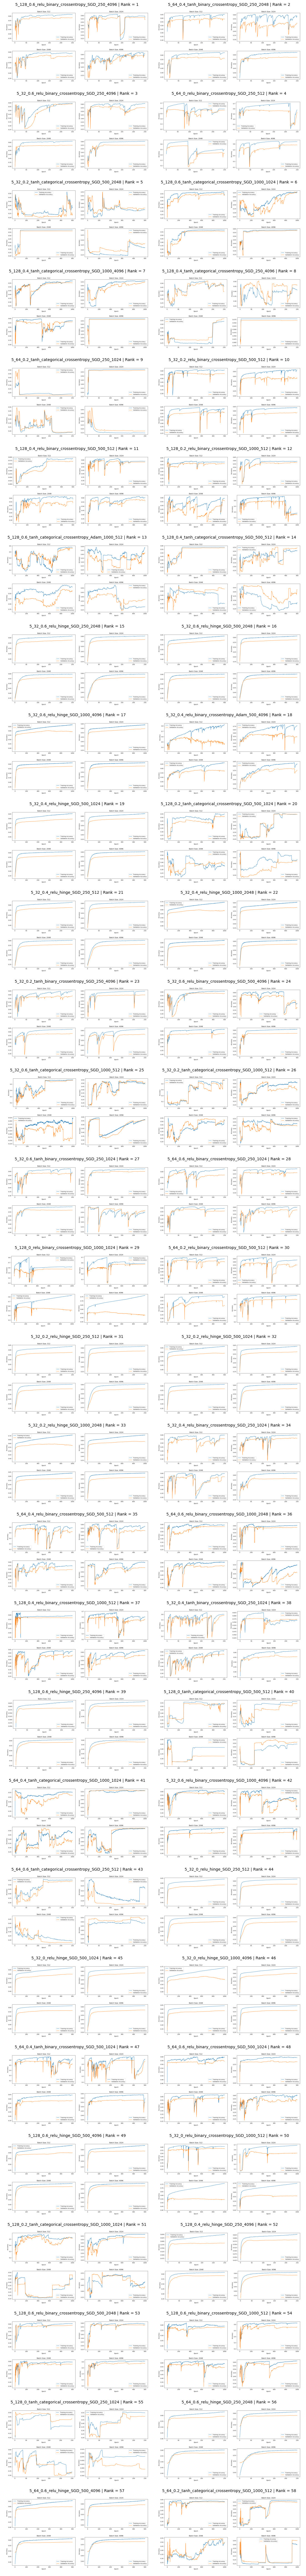

In [19]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}lstm_script_1_top_n_model_train_val_accuracies.png')
plt.show()

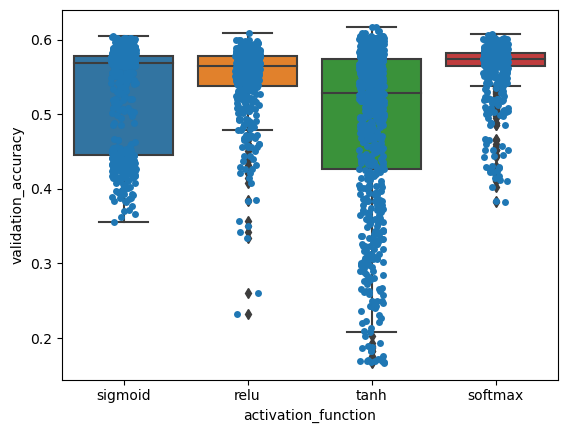

In [20]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

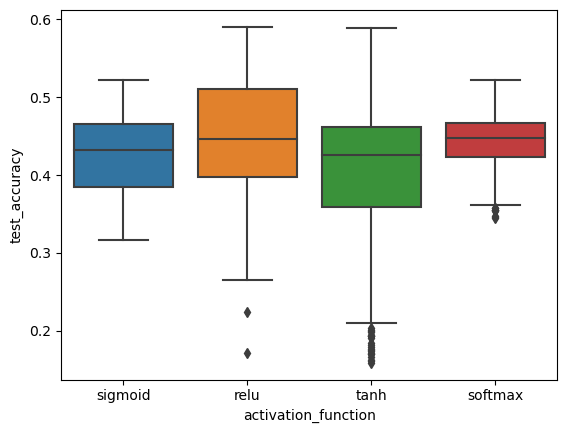

In [21]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()